# Exploit vs. Exploration


In [1]:
import gym
import numpy as np

try:
    gym.make('FrozenLake-v3')
except:
    gym.envs.registration.register(
        id='FrozenLake-v3',
        entry_point='gym.envs.toy_text:FrozenLakeEnv',
        kwargs={
            'map_name': '4x4',
            'is_slippery': True # This option is mandatory for dummy algorithm
        }
    )

In [27]:
env = gym.make('FrozenLake-v3')


Q = np.zeros((env.observation_space.n, env.action_space.n))
num_episodes = 2000

discount = 0.99
learning_rate = 0.85

total_rewards = []
for i in range(num_episodes):
    state = env.reset()
    done = False
    sum_rewards = 0
    while not done:
        action = np.argmax(Q[state,:] + np.random.randn(env.action_space.n) / (i+1))
        new_state, reward, done, info = env.step(action)    
        Q[state,action] = (1 - learning_rate) * Q[state,action] + learning_rate * (reward + discount * np.max(Q[new_state, :]))
        sum_rewards += reward
        state = new_state
    else:
        total_rewards.append(sum_rewards)

In [28]:
print(sum(total_rewards) / num_episodes)
print(Q)

0.696
[[6.65124569e-01 9.96337852e-03 9.73751601e-03 8.37980346e-03]
 [4.34850875e-04 3.28576476e-04 6.48449064e-03 7.43633068e-01]
 [3.40316589e-03 3.03560526e-03 5.79312790e-03 4.57279702e-01]
 [9.80229323e-04 1.23951410e-03 0.00000000e+00 3.96818639e-01]
 [6.35703902e-01 1.13571271e-03 2.68900181e-04 3.91146902e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.27263416e-02 7.43901278e-11 2.27530916e-04 1.39795233e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.47962532e-03 1.05473759e-03 5.86137867e-03 5.19277262e-01]
 [8.12049750e-04 7.32558960e-01 0.00000000e+00 3.65110196e-03]
 [5.18845658e-01 0.00000000e+00 3.13969403e-04 5.46852930e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.37230875e-03 0.00000000e+00 8.48279535e-01 9.03922551e-04]
 [0.00000000e+00 9.76108690e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.

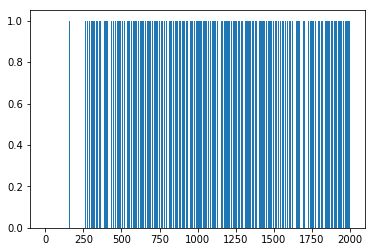

In [29]:
import matplotlib.pyplot as plt
plt.bar(list(range(len(total_rewards))), total_rewards)
plt.show()